# Effective Dimension Plots
This notebook demonstrates and produces the plots of the Effective Dimension from the pickle files generated using the fisher python script

In [6]:
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
#Holds an array of model folders to load up
Models = ['C4','C8','C16','D4','D8']
EDInfo = []

for i in range(len(Models)):
    EDInfo.append(pickle.load(open(f'models/e2attention/mirabest/fisher/{Models[i]}/effd.p','rb')))

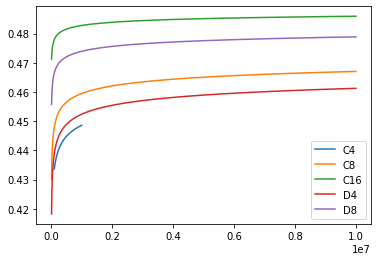

In [20]:

for i in range(len(Models)):
    plt.plot(EDInfo[i]['Samples'][100:], EDInfo[i]['ED'][100:], label=Models[i])
    plt.legend()

# Rank and Fisher Rao Norm Plots

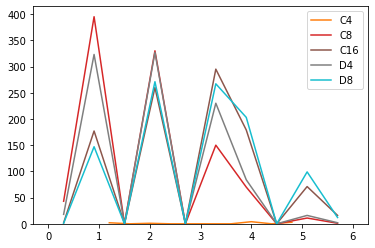

In [21]:
Fishers = []
Ranks = []
RaoNorm = []
for i in range(len(Models)):
    Rank = []
    Fishers.append(pickle.load(open(f"models/e2attention/mirabest/fisher/{Models[i]}/fishers.p",'rb')))
#Calculate the Rank manually
    with torch.no_grad():
        for fisher in Fishers[i]:
            rank = torch.matrix_rank(fisher).item()
            Rank.append(rank)
    n, x, _ = plt.hist(Rank, visible=False)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers,n, label=Models[i])
    Ranks.append(Rank)
plt.legend()